In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import h5py

Migrate from <https://github.com/frogner/caffe/blob/wasserstein/src/caffe/layers/wasserstein_loss_layer.cpp>

In [12]:
groundm_ = np.array(h5py.File("mnist_ground_metric.h5", "r")["data"])

In [13]:
groundm_

array([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.],
       [ 1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.],
       [ 2.,  1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
       [ 3.,  2.,  1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.],
       [ 4.,  3.,  2.,  1.,  0.,  1.,  2.,  3.,  4.,  5.],
       [ 5.,  4.,  3.,  2.,  1.,  0.,  1.,  2.,  3.,  4.],
       [ 6.,  5.,  4.,  3.,  2.,  1.,  0.,  1.,  2.,  3.],
       [ 7.,  6.,  5.,  4.,  3.,  2.,  1.,  0.,  1.,  2.],
       [ 8.,  7.,  6.,  5.,  4.,  3.,  2.,  1.,  0.,  1.],
       [ 9.,  8.,  7.,  6.,  5.,  4.,  3.,  2.,  1.,  0.]], dtype=float32)

In [23]:
groundm_

array([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.],
       [ 1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.],
       [ 2.,  1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
       [ 3.,  2.,  1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.],
       [ 4.,  3.,  2.,  1.,  0.,  1.,  2.,  3.,  4.,  5.],
       [ 5.,  4.,  3.,  2.,  1.,  0.,  1.,  2.,  3.,  4.],
       [ 6.,  5.,  4.,  3.,  2.,  1.,  0.,  1.,  2.,  3.],
       [ 7.,  6.,  5.,  4.,  3.,  2.,  1.,  0.,  1.,  2.],
       [ 8.,  7.,  6.,  5.,  4.,  3.,  2.,  1.,  0.,  1.],
       [ 9.,  8.,  7.,  6.,  5.,  4.,  3.,  2.,  1.,  0.]], dtype=float32)

In [28]:
lambda_ = 0.1

In [29]:
K_ = groundm_.copy()
K_ *= -lambda_
K_ += -1
K_ = np.exp(K_)

In [30]:
K_

array([[ 0.36787945,  0.33287108,  0.30119419,  0.27253181,  0.24659698,
         0.22313017,  0.20189652,  0.18268351,  0.16529889,  0.1495686 ],
       [ 0.33287108,  0.36787945,  0.33287108,  0.30119419,  0.27253181,
         0.24659698,  0.22313017,  0.20189652,  0.18268351,  0.16529889],
       [ 0.30119419,  0.33287108,  0.36787945,  0.33287108,  0.30119419,
         0.27253181,  0.24659698,  0.22313017,  0.20189652,  0.18268351],
       [ 0.27253181,  0.30119419,  0.33287108,  0.36787945,  0.33287108,
         0.30119419,  0.27253181,  0.24659698,  0.22313017,  0.20189652],
       [ 0.24659698,  0.27253181,  0.30119419,  0.33287108,  0.36787945,
         0.33287108,  0.30119419,  0.27253181,  0.24659698,  0.22313017],
       [ 0.22313017,  0.24659698,  0.27253181,  0.30119419,  0.33287108,
         0.36787945,  0.33287108,  0.30119419,  0.27253181,  0.24659698],
       [ 0.20189652,  0.22313017,  0.24659698,  0.27253181,  0.30119419,
         0.33287108,  0.36787945,  0.33287108

In [31]:
KM_ = np.multiply(K_, groundm_)

In [32]:
KlogK = np.multiply(np.log(K_), K_)

In [33]:
KlogK

array([[-0.36787945, -0.36615819, -0.36143303, -0.35429135, -0.34523576,
        -0.33469525, -0.32303444, -0.31056198, -0.29753801, -0.28418037],
       [-0.36615819, -0.36787945, -0.36615819, -0.36143303, -0.35429135,
        -0.34523576, -0.33469525, -0.32303444, -0.31056198, -0.29753801],
       [-0.36143303, -0.36615819, -0.36787945, -0.36615819, -0.36143303,
        -0.35429135, -0.34523576, -0.33469525, -0.32303444, -0.31056198],
       [-0.35429135, -0.36143303, -0.36615819, -0.36787945, -0.36615819,
        -0.36143303, -0.35429135, -0.34523576, -0.33469525, -0.32303444],
       [-0.34523576, -0.35429135, -0.36143303, -0.36615819, -0.36787945,
        -0.36615819, -0.36143303, -0.35429135, -0.34523576, -0.33469525],
       [-0.33469525, -0.34523576, -0.35429135, -0.36143303, -0.36615819,
        -0.36787945, -0.36615819, -0.36143303, -0.35429135, -0.34523576],
       [-0.32303444, -0.33469525, -0.34523576, -0.35429135, -0.36143303,
        -0.36615819, -0.36787945, -0.36615819

## Calculate EMD

In [71]:
prediction = np.random.rand(10)
prediction /= prediction.sum()
target = np.zeros(10)
target[5] = 1
target
prediction

array([ 0.11901983,  0.13532925,  0.09675592,  0.13185965,  0.13822228,
        0.10331983,  0.08312453,  0.10940269,  0.04169821,  0.04126782])

Text(0.5,1,'Target')

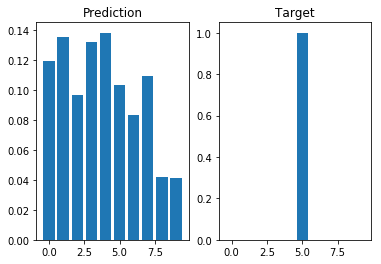

In [72]:
fig, axes = plt.subplots(1, 2)
axes[0].bar(np.arange(10), prediction)
axes[0].set_title("Prediction")
axes[1].bar(np.arange(10), target)
axes[1].set_title("Target")

In [98]:
prediction = prediction.reshape(1, 10)
target = target.reshape(1, 10)

## Iteration

Original cpp code (<https://github.com/frogner/caffe/blob/wasserstein/src/caffe/layers/wasserstein_loss_layer.cpp#L122-L132>):
```
for (int i = 0; i < scaling_iter; i++) {
    // v = ylabel ./ K^t u
    caffe_cpu_gemm(CblasNoTrans, CblasNoTrans, num, dim, dim, Dtype(1.),
                   u, K, Dtype(0.), v);
    caffe_div(count, ylabel, v, v);

    // u = ypred ./ K v
    caffe_cpu_gemm(CblasNoTrans, CblasTrans, num, dim, dim, Dtype(1.),
                   v, K, Dtype(0.), u);
    caffe_div(count, ypred, u, u);
}
```

In [139]:
u_ = np.ones_like(prediction)
v_ = np.ones_like(prediction)

scaling_iter = 100

for i in range(scaling_iter):
    v_ = np.divide(target, np.matmul(u_, K_))
    u_ = np.divide(target, np.matmul(v_, K_.transpose()))

print("u=", u_)
print("v=", v_)

u= [[ 0.          0.          0.          0.          0.          7.87594339
   0.          0.          0.          0.        ]]
v= [[ 0.          0.          0.          0.          0.          0.34513729
   0.          0.          0.          0.        ]]


In [140]:
tmp_ = np.empty_like(u_)
tmp2_ = np.empty_like(u_)

tmp_ = np.matmul(u_, KM)

In [141]:
loss = np.multiply(v_, tmp_).sum()
print(v_.squeeze())
print(tmp_.squeeze())
print(loss)

[ 0.          0.          0.          0.          0.          0.34513729
  0.          0.          0.          0.        ]
[ 8.78680328  7.76873533  6.43933527  4.7443768   2.62167378  0.
  2.62167378  4.7443768   6.43933527  7.76873533]
0.0


In [142]:
tmp_ = np.log(u_)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [143]:
tmp_

array([[       -inf,        -inf,        -inf,        -inf,        -inf,
         2.06381297,        -inf,        -inf,        -inf,        -inf]])